In [79]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, naive_bayes, neighbors, svm
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [80]:
df=pd.read_csv('salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
df.shape

(32561, 15)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [83]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [84]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [85]:
# menghilangkan data duplicated
duplicate = df.duplicated()
print(duplicate.sum())

24


In [86]:
df.drop_duplicates(inplace=True)

In [87]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [88]:
df.shape

(32537, 15)

# Ekstrak Data Numerik dan Kategorik

In [89]:
data_num = [col for col in df.columns if df[col].dtype!='O']
data_num

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [90]:
num_data = df[data_num]
num_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [91]:
data_cat = [col for col in df.columns if df[col].dtype=='O']
data_cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [92]:
cat_data = df[data_cat]
cat_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [93]:
# Check Data Outlier
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [94]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [95]:
for col in num_data.columns:
    has_outliers(num_data, col)

age no
fnlwgt yes
fnlwgt no
education-num no
capital-gain yes
capital-gain no
capital-loss yes
capital-loss no
hours-per-week no


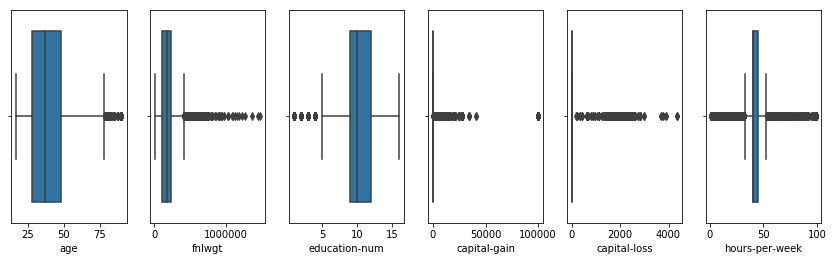

In [96]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [97]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [98]:
replace_with_thresholds(num_data, num_data.columns)

D:\anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\anaconda2\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [99]:
for col in num_data.columns:
    has_outliers(num_data, col)

age no
fnlwgt no
education-num no
capital-gain no
capital-loss no
hours-per-week no


# Exploratory Data Analyst

In [100]:
data = df.copy()

In [101]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [102]:
cat_data['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

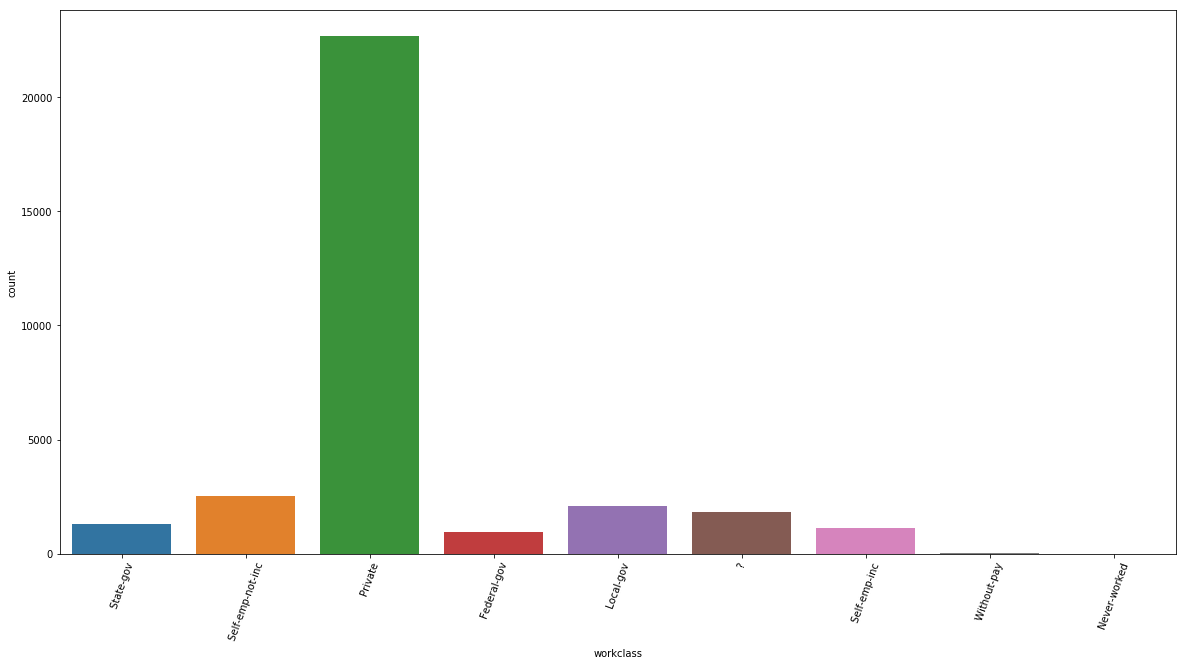

In [134]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='workclass',data=df)
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

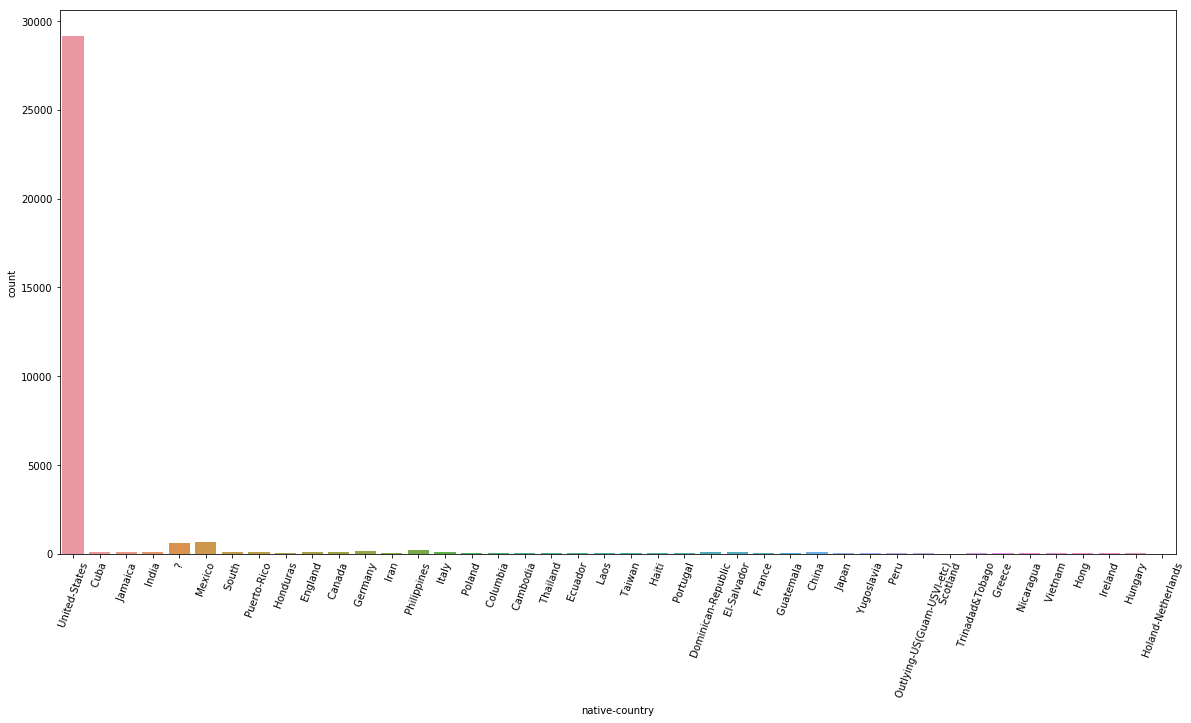

In [135]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='native-country',data=df)
plt.xticks(rotation=70)

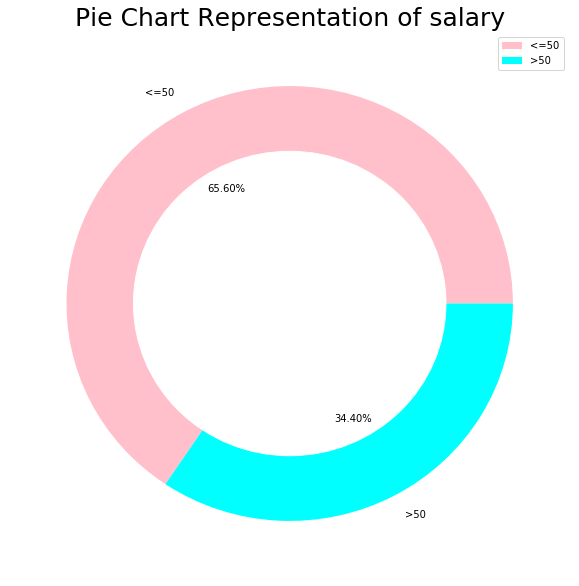

In [104]:
size = [70000, 36708]
colors = ['pink', 'cyan']
labels = "<=50", ">50", 

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of salary', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [105]:
data['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [106]:
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [107]:
# Hapus semua karakter dari kolom size dan ubah menjadi float
data['salary']=data['salary'].str.replace('K','000')
data['salary']=data['salary'].str.replace('<=','1')
data['salary']=data['salary'].str.replace('>','2')
#apps['size']=apps['size'].str.replace('.','')
data['salary']=data['salary'].replace("Varies with device",np.nan)
data['salary']=data['salary'].astype('float')
data['salary']

0        150000.0
1        150000.0
2        150000.0
3        150000.0
4        150000.0
5        150000.0
6        150000.0
7        250000.0
8        250000.0
9        250000.0
10       250000.0
11       250000.0
12       150000.0
13       150000.0
14       250000.0
15       150000.0
16       150000.0
17       150000.0
18       150000.0
19       250000.0
20       250000.0
21       150000.0
22       150000.0
23       150000.0
24       150000.0
25       250000.0
26       150000.0
27       250000.0
28       150000.0
29       150000.0
           ...   
32531    150000.0
32532    250000.0
32533    250000.0
32534    150000.0
32535    150000.0
32536    250000.0
32537    150000.0
32538    250000.0
32539    250000.0
32540    150000.0
32541    150000.0
32542    150000.0
32543    150000.0
32544    150000.0
32545    250000.0
32546    150000.0
32547    150000.0
32548    150000.0
32549    150000.0
32550    150000.0
32551    150000.0
32552    150000.0
32553    150000.0
32554    250000.0
32555    1

In [110]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['salary'] >= 250000), 'salary_new'] = 1
data.loc[(data['salary'] <= 150000), 'salary_new'] = 0

data['salary_new'].value_counts()


0.0    24698
1.0     7839
Name: salary_new, dtype: int64

In [112]:
data.drop(['salary'], axis=1, inplace = True)

In [116]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_new
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0.0
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0


In [117]:
encoder = LabelEncoder()
data['workclass'] = encoder.fit_transform(data['workclass'])
workclass = {index : label for index, label in enumerate(encoder.classes_)}
workclass

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

In [118]:
data['education'] = encoder.fit_transform(data['education'])
education = {index : label for index, label in enumerate(encoder.classes_)}

data['relationship'] = encoder.fit_transform(data['relationship'])
relationship = {index : label for index, label in enumerate(encoder.classes_)}

data['race'] = encoder.fit_transform(data['race'])
race = {index : label for index, label in enumerate(encoder.classes_)}

data['sex'] = encoder.fit_transform(data['sex'])
sex = {index : label for index, label in enumerate(encoder.classes_)}

data['occupation'] = encoder.fit_transform(data['occupation'])
occupation = {index : label for index, label in enumerate(encoder.classes_)}

data['native-country'] = encoder.fit_transform(data['native-country'])
native_country = {index : label for index, label in enumerate(encoder.classes_)}

data['marital-status'] = encoder.fit_transform(data['marital-status'])
martial_status = {index : label for index, label in enumerate(encoder.classes_)}


In [119]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_new
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0.0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0.0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0.0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0.0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0.0


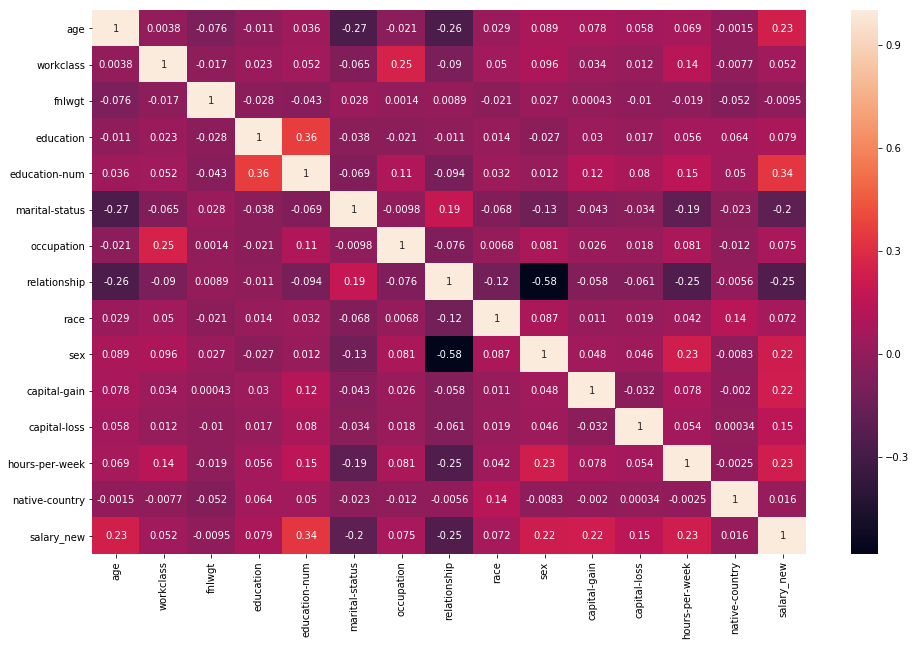

In [120]:
f, ax = plt.subplots(figsize=(16, 10))
RD = data.corr()
sns.heatmap(RD, ax=ax, annot=True)

In [121]:
# data split
x = data.drop('salary_new', axis=1)
y = data['salary_new']

In [122]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
x = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.30136986 0.875      0.0443019  0.6        0.8        0.66666667
  0.07142857 0.2        1.         1.         0.02174022 0.
  0.39795918 0.95121951]
 [0.45205479 0.75       0.0482376  0.6        0.8        0.33333333
  0.28571429 0.         1.         1.         0.         0.
  0.12244898 0.95121951]
 [0.28767123 0.5        0.13811345 0.73333333 0.53333333 0.
  0.42857143 0.2        1.         1.         0.         0.
  0.39795918 0.95121951]
 [0.49315068 0.5        0.15106831 0.06666667 0.4        0.33333333
  0.42857143 0.         0.5        1.         0.         0.
  0.39795918 0.95121951]
 [0.15068493 0.5        0.22148843 0.6        0.8        0.33333333
  0.71428571 1.         0.5        0.         0.         0.
  0.39795918 0.12195122]
 [0.2739726  0.5        0.18493161 0.8        0.86666667 0.33333333
  0.28571429 1.         1.         0.         0.         0.
  0.39795918 0.95121951]
 [0.43835616 0.5        0.10044824 0.4        0.26666667 0.5
  0.57142857 0.2        0

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.8505040570445046
RandomForestClassifierModel Test Score is :  0.8538414259373079
RandomForestClassifierModel features importances are :  [0.06762551 0.00377539 0.00129515 0.02830425 0.18456806 0.18987383
 0.01289678 0.19361487 0.00098228 0.03083712 0.19993195 0.04258886
 0.04317453 0.00053141]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.71687525 0.28312475]
 [0.92871822 0.07128178]
 [0.63823978 0.36176022]
 [0.94032288 0.05967712]
 [0.84460759 0.15539241]
 [0.90120042 0.09879958]
 [0.9253448  0.0746552 ]
 [0.98181579 0.01818421]
 [0.73034725 0.26965275]
 [0.35743992 0.64256008]]


In [126]:
from sklearn.metrics import accuracy_score

In [127]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  6946


In [128]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.8538414259373079


Confusion Matrix is : 
 [[5915  244]
 [ 945 1031]]


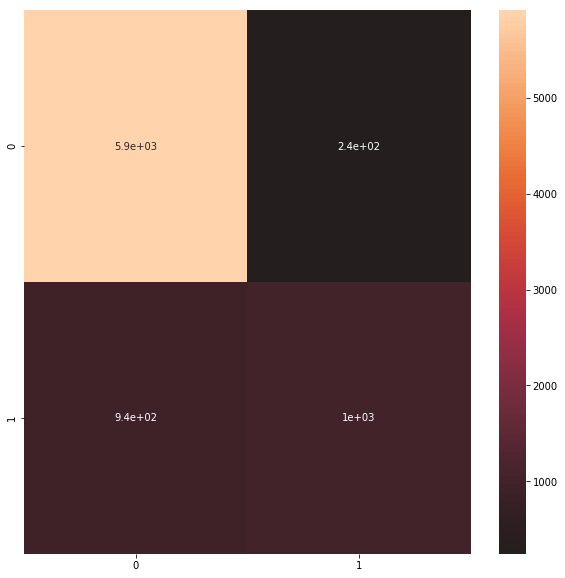

In [129]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,annot=True)
plt.show()

In [130]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 [0. 0. 0. ... 0. 0. 0.] 
 Accuracy: 82.15119852489245 %


In [131]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
knn_acc = 100*knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), '\n Accuracy:', knn_acc, '%')

K-Nearest Neighbours Predictions: 
 [0. 0. 1. ... 0. 0. 1.] 
 Accuracy: 83.18377381684081 %


In [132]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100*nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), '\n Accuracy:', nb_acc, '%')

Naive Bayes Predictions: 
 [0. 0. 0. ... 0. 0. 0.] 
 Accuracy: 80.54087277197296 %


In [133]:
from sklearn.tree import DecisionTreeClassifier 
# Import Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 


tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(x_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train score: 0.8056306860093435
Test score: 0.8145052243392747
Accuracy: 0.8442532267977874


# Summary